# Waveform fitting

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
from positive import *
from nrutils import scsearch, gwylm
from glob import glob
from pwca import determine_data_fitting_region,pwca_catalog

(positive)>> Applying custom matplotlib settings.
(init)>> Warm greetings from Welsh Puck (aka pwca).
(pwca.core)>> Metadata for calibration runs stored to "pwca.pwca_catalog"


## Preliminaries

In [2]:
scsearch(catalog=pwca_catalog,verbose=True);

(scsearch)>> Found catalog (=...) keyword.
(scsearch)>> Found verbose (=True) keyword.
## Found 40 possibly degenerate simulations:
[0001][hogshead] q8precessing: 1chi0.80-p-q8.00	(q8a08t120dP2_r03_T_96_360)
[0002][hogshead] q8precessing: 1chi0.40-p-q8.00	(q8a04t60D_dPm1)
[0003][hogshead] q4: 1chi0.80-p-q4.00	(q4a08t90dPm1D_T_96_384)
[0004][hogshead] q8precessing: 1chi0.40-p-q8.00	(q8a04t120dPp1_T_96_360)
[0005][hogshead] q8precessing: 1chi0.40-p-q8.00	(q8a04t90dP0_T_96_360)
[0006][hogshead] chinmay_precessingRuns: 1chi0.80-p-q2.00	(q2_a10_a28_ph0_th150)
[0007][hogshead] chinmay_precessingRuns: 1chi0.80-p-q2.00	(q2_a10_a28_ph0_th120)
[0008][hogshead] chinmay_precessingRuns: 1chi0.80-p-q2.00	(q2_a10_a28_ph0_th90)
[0009][hogshead] chinmay_precessingRuns: 1chi0.80-p-q2.00	(q2_a10_a28_ph0_th60)
[0010][hogshead] chinmay_precessingRuns: 1chi0.80-p-q2.00	(q2_a10_a28_ph0_th30)
[0011][hogshead] q8: 1chi0.80-p-q8.00	(q8a08t90dP0_T_96_384)
[0012][hogshead] q4: 1chi0.80-p-q4.00	(q4a08t30dPm5p5dRm4

In [39]:
?savetxt

Signature: savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)
Docstring:
Save an array to a text file.

Parameters
----------
fname : filename or file handle
    If the filename ends in ``.gz``, the file is automatically saved in
    compressed gzip format.  `loadtxt` understands gzipped files
    transparently.
X : 1D or 2D array_like
    Data to be saved to a text file.
fmt : str or sequence of strs, optional
    A single format (%10.5f), a sequence of formats, or a
    multi-format string, e.g. 'Iteration %d -- %10.5f', in which
    case `delimiter` is ignored. For complex `X`, the legal options
    for `fmt` are:

    * a single specifier, `fmt='%.4e'`, resulting in numbers formatted
      like `' (%s+%sj)' % (fmt, fmt)`
    * a full string specifying every real and imaginary part, e.g.
      `' %.4e %+.4ej %.4e %+.4ej %.4e %+.4ej'` for 3 columns
    * a list of specifiers, one per column - in this case, the real
      an

In [43]:

#
from numpy.linalg import norm

#
datadir = '/Users/book/KOALA/puck/ll/data/version2/'
files = glob( datadir+'*.txt' )

#
metadata = []

#
for f in files:

    #
    file_name = f.split('/')[-1].split('.')[0]

    #
    catalog = pwca_catalog

    #
    A = scsearch( keyword=file_name, verbose=not True, catalog=catalog )

    #
    a = A[0]

    #
    m1,m2 = a.m1,a.m2 
    eta = m1*m2/(m1+m2)

    #
    if 'th' in file_name:
        foo = file_name.split('th')[-1]
    elif 't' in file_name:
        foo = file_name.split('Dit')[0]
        foo = foo.split('t')[-1]
        foo = foo.lower().split('d')[0]
        foo = foo.split('_')[0]
    #
    theta = int(foo)
    
    #
    X1,X2,L = a.X1,a.X2,a.L
    
    #
    chi1 = norm(X1)
    chi2 = norm(X2)
    if abs(m1-m2)<1e-4:
        if (chi1<1e-4) and (chi2>1e-4):
            chi2 = 0
            chi1 = chi2
            X1,X2 = [ array(k) for k in (X2,X1) ]
            m1=m2=0.5
    
    #
    chi_p   = calc_chi_p(   m1,X1, m2,X2, L )
    chi_eff = calc_chi_eff( m1,X1, m2,X2, L )
    
    #
    delta = (m1-m2)/(m1+m2)
    
    #
    metadata.append( [ file_name,
                      theta,
                      eta,
                      delta,
                      chi_eff,
                      chi_p,
                      chi1,
                      chi2 ] )
    
#
metadata = array(metadata)

#
metadata_path = '/Users/book/KOALA/puck/ll/data/metadata'
savez(metadata_path,metadata)
    
        


In [4]:


#
for f in files:
    
    #
    alert('Loading %s'%red(f))
    raw_data = loadtxt(f).T
    
    #
    data,_,fmin,fmax = determine_data_fitting_region(raw_data)
    
    #
    md = collect_file_metadata( f )
    
    #
    f,amp_td,amp_fd,dphi_td,dphi_fd = d.T

(notebook)>> Loading /Users/book/KOALA/puck/ll/data/version2/q2_a10_a28_ph0_th90.txt
(notebook)>> Loading /Users/book/KOALA/puck/ll/data/version2/q8a04t30dPm3_T_96_360.txt
(notebook)>> Loading /Users/book/KOALA/puck/ll/data/version2/q2a04t60dPm1_T_96_408.txt
(notebook)>> Loading /Users/book/KOALA/puck/ll/data/version2/q2_a10_a28_ph0_th120.txt
(notebook)>> Loading /Users/book/KOALA/puck/ll/data/version2/q1a04t60_dPm1_T_96_552.txt
(notebook)>> Loading /Users/book/KOALA/puck/ll/data/version2/q4a04t30_T_96_360.txt
(notebook)>> Loading /Users/book/KOALA/puck/ll/data/version2/q8a04t120dPp1_T_96_360.txt
(notebook)>> Loading /Users/book/KOALA/puck/ll/data/version2/q4a04t150_T_96_360.txt
(notebook)>> Loading /Users/book/KOALA/puck/ll/data/version2/q4a04t60dPm1.5D_T_96_360.txt
(notebook)>> Loading /Users/book/KOALA/puck/ll/data/version2/q1a08t30dPm25_T_96_408.txt
(notebook)>> Loading /Users/book/KOALA/puck/ll/data/version2/q8a04t60D_dPm1.txt
(notebook)>> Loading /Users/book/KOALA/puck/ll/data/ve

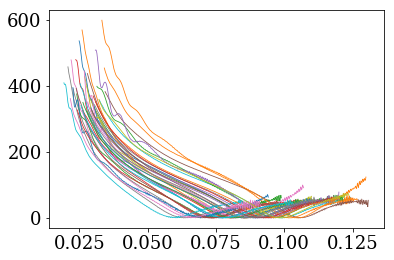

In [10]:

figure()

for d in data:
    
    f,amp_td,amp_fd,dphi_td,dphi_fd = d.T
    
    plot( f, dphi_td-min(dphi_td) )